In [1]:
import cartopy

In [2]:
import xarray as xr
import sys
sys.path.insert(0,"/home/albert/lib/python")

import numpy as np
sys.path.insert(0,"/home/albert/Work/git/xscale")
import xscale
import xscale.spectral.fft as xfft
from matplotlib.colors import LogNorm
import cmocean
import matplotlib.pylab as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


/home/albert/anaconda2/lib/python2.7/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [3]:
gridfile="/mnt/albert/equipes/IGE/meom/workdir/albert/eNATL60/eNATL60-I/mesh_mask_eNATL60_3.6.nc"
dsgrid=xr.open_mfdataset(gridfile)
ff=dsgrid['ff']

In [4]:
def plot_surf(sub,data,lon,lat,vmin,vmax,cmap,title):
    
    ax = plt.subplot(sub,projection=ccrs.PlateCarree(central_longitude=0))
    ax.set_extent((-36, -26, 25, 40))
    land = cfeature.GSHHSFeature(scale='intermediate',
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
    ax.add_feature(land)
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)

    plt.pcolormesh(lon,lat,data,cmap=cmap,vmin=vmin,vmax=vmax )
    plt.colorbar(orientation='horizontal',pad=0.1)
    plt.title(title)

    ax.plot([-31, -28], [33, 33],color='black',linewidth=4)
    ax.plot([-31, -28], [36, 36],color='black',linewidth=4)
    ax.plot([-31, -31], [33, 36],color='black',linewidth=4)
    ax.plot([-28, -28], [33, 36],color='black',linewidth=4)


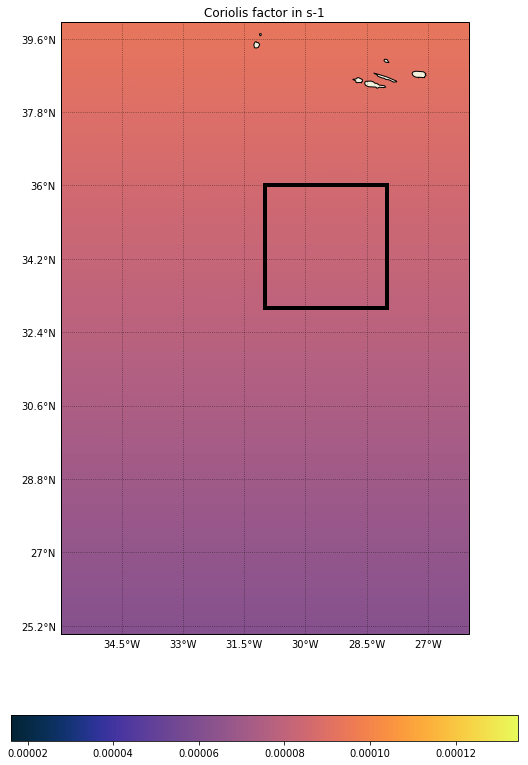

In [5]:
fig=plt.figure(figsize=(20,15))

navlat= dsgrid['nav_lat']
navlon= dsgrid['nav_lon']
plot_surf(121,ff[0],navlon,navlat,np.min(ff[0].values),np.max(ff[0].values),cmocean.cm.thermal,'Coriolis factor in s-1')



In [ ]:
box=(-31,-28,33,36)
domain=(box[0]<navlon)*(navlon<box[1])*(box[2]<navlat)*(navlat<box[3])
where=np.where(domain)

lats=navlat[where]
lons=navlon[where]


ind = np.unravel_index(np.argmin(lats, axis=None), lats.shape)
jmin = where[0][ind[0]]
ind = np.unravel_index(np.argmax(lats, axis=None), lats.shape)
jmax = where[0][ind[0]]
ind = np.unravel_index(np.argmin(lons, axis=None), lons.shape)
imin = where[1][ind[1]]
ind = np.unravel_index(np.argmax(lons, axis=None), lons.shape)
imax = where[1][ind[1]]

ffbox=ff[0,jmin:jmax+1,imin:imax+1]

ffmean=np.mean(ffbox.values)

T=2*np.pi/(ffmean)
T2=2*np.pi/(1E-4)

In [34]:
fileUtide="/mnt/albert/equipes/IGE/meom/MODEL_SET/eNATL60/eNATL60-BLBT02-S/1h/ACO/eNATL60ACO-BLBT02_1h_20090710_20090809_gridU-2D.nc"
fileVtide="/mnt/albert/equipes/IGE/meom/MODEL_SET/eNATL60/eNATL60-BLBT02-S/1h/ACO/eNATL60ACO-BLBT02_1h_20090710_20090809_gridV-2D.nc"

fileUnotide="/mnt/albert/equipes/IGE/meom/MODEL_SET/eNATL60/eNATL60-BLB002-S/1h/ACO/eNATL60ACO-BLB002_1h_20090710_20090809_gridU-2D.nc"
fileVnotide="/mnt/albert/equipes/IGE/meom/MODEL_SET/eNATL60/eNATL60-BLB002-S/1h/ACO/eNATL60ACO-BLB002_1h_20090710_20090809_gridV-2D.nc"

fUtide = xr.open_mfdataset(fileUtide,chunks={'x':500,'y':500})
Utide=fUtide['sozocrtx'][:]
navlat= fUtide['nav_lat']
navlon= fUtide['nav_lon']

fUnotide = xr.open_mfdataset(fileUnotide,chunks={'x':500,'y':500})
Unotide=fUnotide['sozocrtx'][:]

fVtide = xr.open_mfdataset(fileVtide,chunks={'x':500,'y':500})
Vtide=fVtide['somecrty'][:]

fVnotide = xr.open_mfdataset(fileVnotide,chunks={'x':500,'y':500})
Vnotide=fVnotide['somecrty'][:]


In [35]:
box=(-31,-28,33,36)
domain=(box[0]<navlon)*(navlon<box[1])*(box[2]<navlat)*(navlat<box[3])
where=np.where(domain)

lats=navlat[where]
lons=navlon[where]


In [36]:

ind = np.unravel_index(np.argmin(lats, axis=None), lats.shape)
jmin = where[0][ind[0]]
ind = np.unravel_index(np.argmax(lats, axis=None), lats.shape)
jmax = where[0][ind[0]]
ind = np.unravel_index(np.argmin(lons, axis=None), lons.shape)
imin = where[1][ind[1]]
ind = np.unravel_index(np.argmax(lons, axis=None), lons.shape)
imax = where[1][ind[1]]


In [37]:
ii=(imin+imax)/2
jj=(jmin+jmax)/2


In [38]:
print ii,jj

473 775


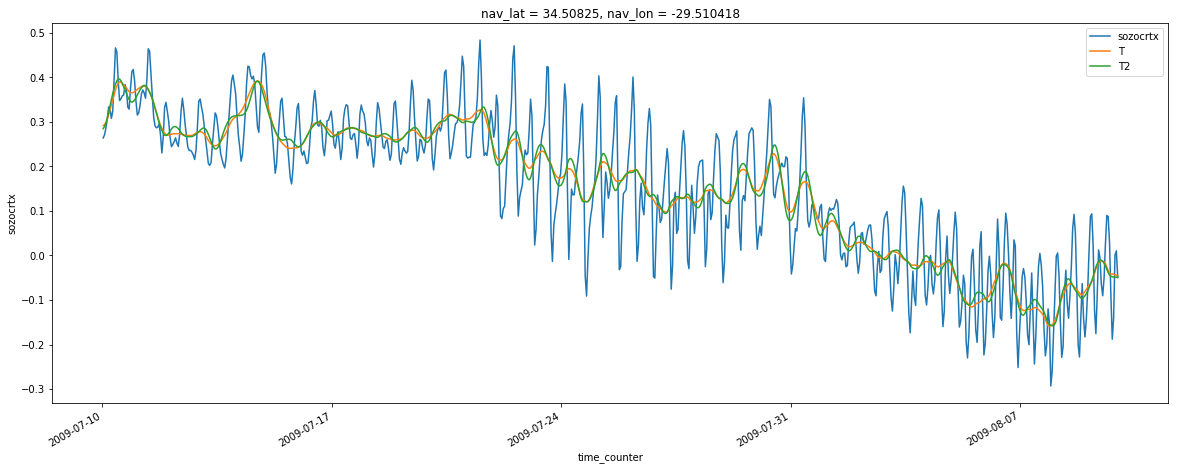

In [40]:

wutide1=Utide.window
wutide1.set(n=48,dim='time_counter', cutoff=T)
Utidefilt1=wutide1.convolve()

wutide3=Utide.window
wutide3.set(n=48,dim='time_counter', cutoff=T2)
Utidefilt3=wutide3.convolve()

fig=plt.figure(figsize=(20,7))
Utide.isel(y=jj, x=ii).plot()
Utidefilt1.isel(y=jj, x=ii).plot(label='T')
Utidefilt3.isel(y=jj, x=ii).plot(label='T2')
plt.legend()